In [1]:
# Import dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing crime data CSV
greater_houston_df = pd.read_csv("../Resources/CSV/houston_area_crime_data.csv")

# Load DF
greater_houston_df.head()

,County,Year,Agency_Count,Murder,Rape,Assault,Burglary,Larceny,Auto_Theft,Violent_Offenses,NonViolent_Offenses,Total_Crime,Population
0,Austin County,2015,5,0,8,53,121,283,13,61,417,482,29354
1,Austin County,2016,5,0,6,43,136,239,31,49,406,466,29718
2,Austin County,2017,5,0,11,34,98,183,45,45,326,376,29963
3,Austin County,2018,5,0,11,32,82,138,29,43,249,295,29912
4,Austin County,2019,5,0,5,38,80,147,29,43,256,302,30009


In [3]:
# Check shape of DF
greater_houston_df.County.value_counts()

Austin County         6
Matagorda County      6
Washington County     6
Waller County         6
Walker County         6
San Jacinto County    6
Polk County           6
Montgomery County     6
Liberty County        6
Brazoria County       6
Harris County         6
Grimes County         6
Galveston County      6
Fort Bend County      6
Chambers County       6
Brazos County         6
Wharton County        6
Name: County, dtype: int64

In [4]:
%matplotlib inline

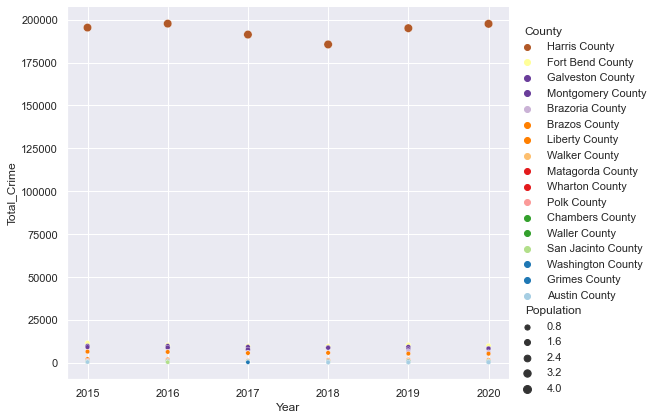

In [5]:
import seaborn as sns
sns.set_theme(style="ticks")

# Set variable for houston counties
houston_counties = greater_houston_df.sort_values("Total_Crime", ascending=False)

# Plot the lines on two facets
sns.set_theme(style="darkgrid")
sns.relplot(
    data=houston_counties,
    x="Year", y="Total_Crime",size = 'Population',
    hue="County", kind="scatter", palette = 'Paired_r',
    height=6, aspect=1.25, facet_kws=dict(sharex=False),
)

plt.savefig('Outputs/Greater_Houston_Totals_Vs_Year.jpg', dpi=100)

In [6]:
# Import new data
texas_crime_df = pd.read_csv("../Resources/CSV/texas_county_totals.csv")

# Check DF
texas_crime_df.head()

,county,murder,rape,assault,burglary,larceny,auto_theft,violent_offenses,nonviolent_offenses,total_crime,population
0,Anderson County,20,153,890,1511,3271,447,1063,5229,6390,57500
1,Andrews County,3,84,359,370,1491,200,446,2061,2528,18508
2,Angelina County,18,237,1211,3702,9420,937,1466,14059,15764,87485
3,Aransas County,12,130,734,2088,4826,366,876,7280,8213,32674
4,Archer County,0,7,31,34,95,18,38,147,186,3472


In [7]:
# Make new DF 
top_5_texas = texas_crime_df[(texas_crime_df['county'] == 'Harris County') | 
                       (texas_crime_df['county'] == 'Dallas County') |
                       (texas_crime_df['county'] == 'Tarrant County') |
                       (texas_crime_df['county'] == 'Bexar County') |
                       (texas_crime_df['county'] == 'Travis County')]
top_5_texas

,county,murder,rape,assault,burglary,larceny,auto_theft,violent_offenses,nonviolent_offenses,total_crime,population
14,Bexar County,825,8908,45824,71777,356443,46313,55557,474533,543627,1972257
56,Dallas County,1372,7895,45402,95363,328655,83406,54669,507424,595792,2899477
100,Harris County,2536,13361,123097,165783,656872,124937,138994,947592,1162602,4707136
219,Tarrant County,626,6607,29799,51300,242547,31980,37032,325827,374028,2004920
226,Travis County,250,4835,18067,34661,188887,18680,23152,242228,272082,1290144


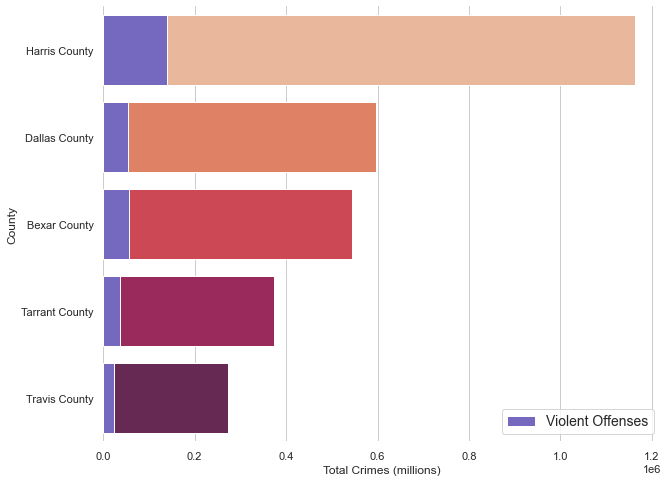

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Load the data
top_5_total = top_5_texas.sort_values("total_crime", ascending=False)

# Plot the total crimes
sns.set_palette("rocket_r")
sns.barplot(data=top_5_total, x="total_crime", y="county")

# Plot the crashes where alcohol was involved
sns.barplot(x="violent_offenses", y="county", data=top_5_total,
            label="Violent Offenses", color="slateblue")

# Add a legend and informative axis label
ax.set(ylabel="County", xlabel="Total Crimes (millions)")
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 14)
sns.despine(left=True, bottom=True)

plt.savefig('Outputs/Top_5_Texas_Counties.jpg', dpi=100)

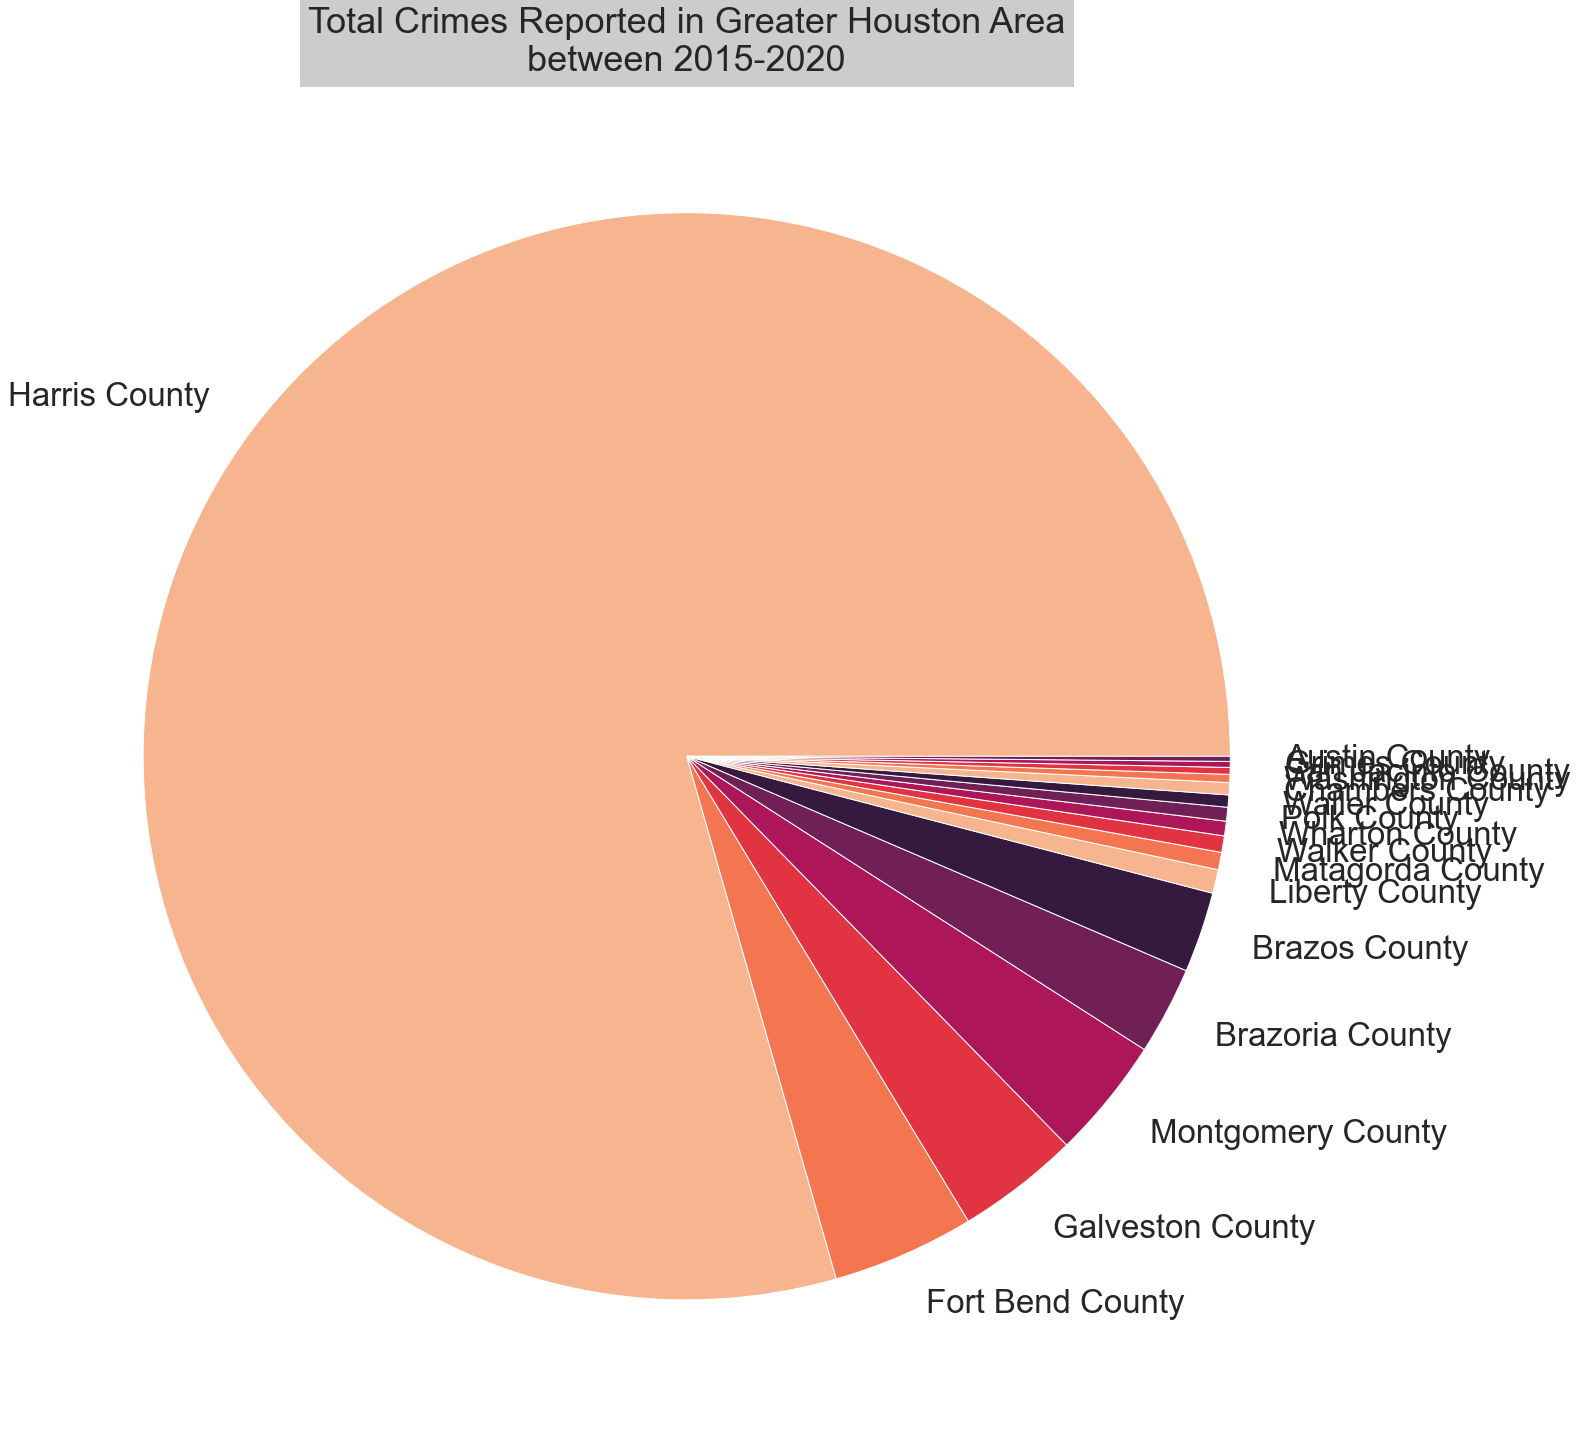

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
numbers = pd.read_csv("../Resources/CSV/houston_county_totals.csv")
numbers = numbers.sort_values("total_crimes", ascending=False)

# Set size of pie chart
f, ax = plt.subplots(figsize=(25,25))

# Set theme, font font size, and title
sns.set_theme(palette="dark", font="arial", font_scale= 3)
plt.title("Total Crimes Reported in Greater Houston Area\n" + "between 2015-2020", bbox={'facecolor':'0.8', 'pad':9})

# Define data
data = numbers.total_crimes
labels = numbers["Unnamed: 0"]

# Define Seaborn color palette to use
colors = sns.color_palette('rocket_r')

# Create pie chart
plt.pie(data, labels = labels, colors = colors)
plt.savefig('Outputs/Greater_Houston_Pie_Chart.jpg', dpi=50)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


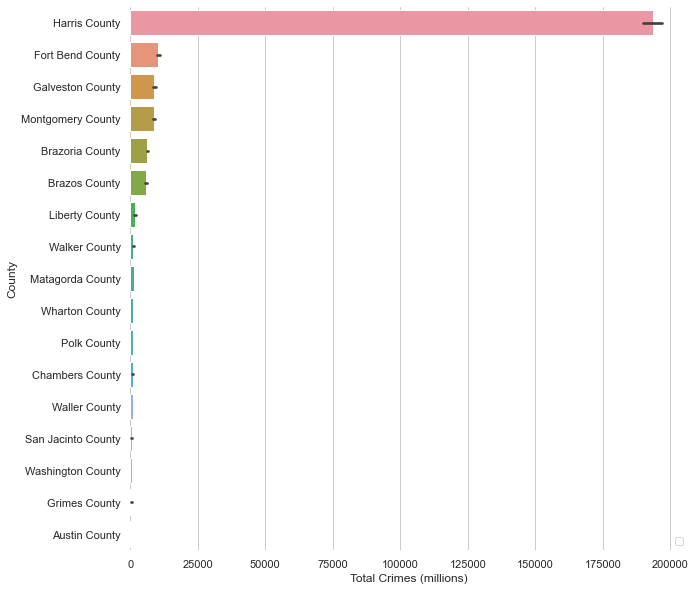

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Import new data
texas_crime_df = pd.read_csv("../Resources/CSV/houston_area_crime_data.csv")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Load the data
texas_total = texas_crime_df.sort_values("Total_Crime", ascending=False)

# Plot the total crimes
sns.set_palette("rocket_r")
sns.barplot(data=texas_total, x="Total_Crime", y="County")

# Add a legend and informative axis label
ax.set(ylabel="County", xlabel="Total Crimes (millions)")
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize = 10)
sns.despine(left=True, bottom=True)

plt.savefig('Outputs/Houston_Counties.jpg', dpi=100)

In [11]:
# Import Data
yearly_totals = pd.read_csv("../Resources/CSV/yearly_totals.csv")
yearly_totals

,Year,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto_Theft,Violent_Offenses,NonViolent_Offenses,Total_Crimes
0,2015,1315,12395,31853,67234,152297,555782,67226,80944,775305,888102
1,2016,1472,13463,33241,72494,148222,550072,68839,87429,767133,887803
2,2017,1412,14542,32119,75256,132885,519621,67638,91210,720144,843473
3,2018,1337,15097,28319,74096,117399,492242,69858,90530,679499,798348
4,2019,1442,15346,29064,75878,112463,499861,77814,92666,690138,811868
5,2020,1972,14308,27007,89248,108071,466494,84409,105528,658974,791509


In [12]:
# Reorder Columns
yearly_totals = yearly_totals[['Year','Murder','Rape', 'Robbery', 'Auto_Theft', 'Assault', 
                               'Burglary', 'Larceny', 'Violent_Offenses', 'NonViolent_Offenses', 'Total_Crimes']]

# Check new DF
yearly_totals

,Year,Murder,Rape,Robbery,Auto_Theft,Assault,Burglary,Larceny,Violent_Offenses,NonViolent_Offenses,Total_Crimes
0,2015,1315,12395,31853,67226,67234,152297,555782,80944,775305,888102
1,2016,1472,13463,33241,68839,72494,148222,550072,87429,767133,887803
2,2017,1412,14542,32119,67638,75256,132885,519621,91210,720144,843473
3,2018,1337,15097,28319,69858,74096,117399,492242,90530,679499,798348
4,2019,1442,15346,29064,77814,75878,112463,499861,92666,690138,811868
5,2020,1972,14308,27007,84409,89248,108071,466494,105528,658974,791509


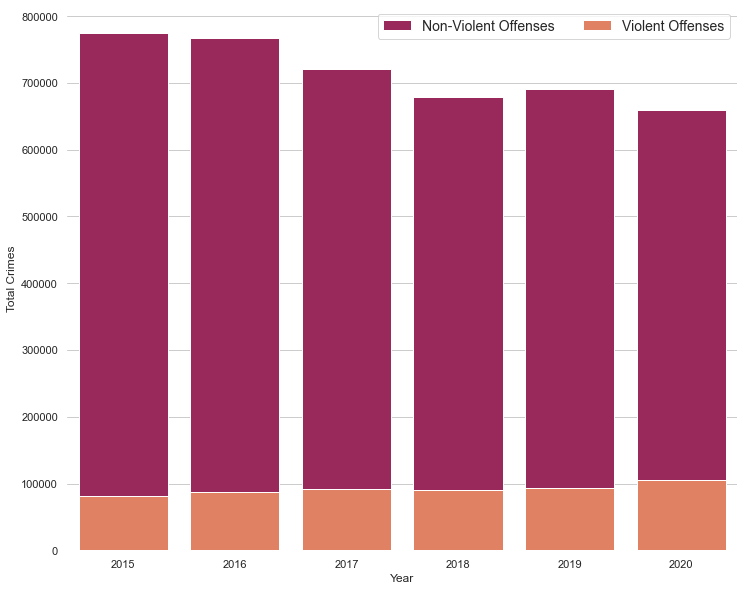

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Load the data
yearly_totals = yearly_totals.sort_values("Year", ascending=False)

# Plot the total crimes
sns.barplot(data=yearly_totals, x="Year", y="NonViolent_Offenses", label="Non-Violent Offenses", color="#ad1659")

# Plot the crashes where alcohol was involved
sns.barplot(x="Year", y="Violent_Offenses", data=yearly_totals,
            label="Violent Offenses", color="#f47650")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True, fontsize = 14)
ax.set(ylabel="Total Crimes", xlabel="Year")
sns.despine(left=True, bottom=True)
plt.savefig('Outputs/Yearly_Totals_by_Offense_Type.jpg', dpi=100)